In [20]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [21]:
target = []
images = []
flat_data = []

categories = []
datadir = 'D:\\Images\\dog_cat'

for category in os.listdir(datadir):
    categories.append(category)

for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        #print(img_array.shape)
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)

In [22]:
# print(flat_data)
# print(categories)
# print(images)

In [23]:
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [24]:
print(len(images[0]))
print(images[0].shape)

150
(150, 150, 3)


<BarContainer object of 2 artists>

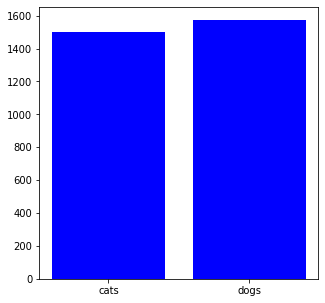

In [25]:
unique,count = np.unique(target,return_counts=True)
fig = plt.figure(figsize = (5, 5))
plt.bar(categories,count, color ='blue')

In [26]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,target,test_size=0.25, random_state=42)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train[:10])

(2305, 150, 150, 3)
(2305,)
(769, 150, 150, 3)
(769,)
[1 1 1 0 0 1 0 1 1 1]


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak

In [43]:
# Initialize the image classifier.
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=1)
# Feed the image classifier with training data.
clf.fit(x_train, y_train, epochs=10)

Trial 1 Complete [00h 15m 12s]
val_loss: 0.6295892000198364

Best val_loss So Far: 0.6295892000198364
Total elapsed time: 00h 15m 12s
INFO:tensorflow:Oracle triggered exit

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/10
73/73 [==============================] - 117s 2s/step - loss: 0.8995 - accuracy: 0.5575
Epoch 2/10
73/73 [==============================] - 109s 1s/step - loss: 0.6207 - accuracy: 0.6456
Epoch 3/10
73/73 [==============================] - 113s 2s/step - loss: 0.5099 - accuracy: 0.7610
Epoch 4/10
73/73 [=====================

In [47]:
predicted_y = clf.predict(x_test)


In [58]:
print(len(predicted_y))
print(predicted_y[32][0])

769
1.0


In [59]:
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

25/25 [==============================] - 9s 343ms/step - loss: 1.2438 - accuracy: 0.6593
[1.2437844276428223, 0.6592977643013]


In [94]:
# Export Model
model = clf.export_model()
print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

model.save("dogs_cats.h5")

<class 'tensorflow.python.keras.engine.functional.Functional'>


In [29]:
# Load Model and suported library
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import autokeras as ak
from tensorflow.keras.models import load_model

model1 = load_model("dogs_cats.h5", custom_objects=ak.CUSTOM_OBJECTS)


Enter image URL https://th.bing.com/th/id/OIP.2icmwOW5uV0403jpBxVIrAHaE8?w=274&h=183&c=7&o=5&dpr=1.5&pid=1.7


0
PREDICTED OUTPUT : cats


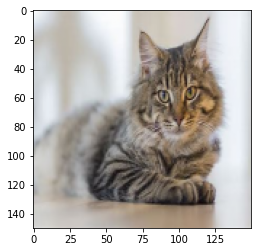

In [19]:
# Testing A new Image

image = []
url = input('Enter image URL')
img = imread(url)
# print(img)
try:
    img_resized = resize(img,(150,150,3))
    image.append(img_resized)
    image = np.array(image)
#     print(image.shape)

    output = model1.predict(image)
    print(int(output[0][0]))
    output1 = categories[int(output[0][0])]
    print(f'PREDICTED OUTPUT : {output1}')    
    plt.imshow(img_resized)
    
except Exception as e:
    print("Unable to predict image")


In [36]:
x_test[9]

array([[[0.32981373, 0.24489869, 0.19117647],
        [0.39734314, 0.25828431, 0.1555    ],
        [0.44735294, 0.29867647, 0.1754085 ],
        ...,
        [0.09045752, 0.06300654, 0.03163399],
        [0.08235294, 0.05490196, 0.02352941],
        [0.08235294, 0.05882353, 0.04249673]],

       [[0.39753922, 0.31714706, 0.27108824],
        [0.4120098 , 0.31793137, 0.25086275],
        [0.48155229, 0.38831699, 0.30944444],
        ...,
        [0.09215686, 0.06470588, 0.03333333],
        [0.09215686, 0.06764706, 0.03677451],
        [0.09117647, 0.06846732, 0.04951961]],

       [[0.42481373, 0.3680915 , 0.34014052],
        [0.54323529, 0.51668627, 0.50146078],
        [0.41349673, 0.3944281 , 0.37901961],
        ...,
        [0.10588235, 0.07843137, 0.04705882],
        [0.09901961, 0.07156863, 0.04117647],
        [0.08495425, 0.06470588, 0.03529412]],

       ...,

       [[0.74557843, 0.52383007, 0.16318627],
        [0.72660784, 0.54798039, 0.2999902 ],
        [0.72678105, 0

In [37]:
x= model1.predict(x_test[9])
x

InvalidArgumentError:  Matrix size-incompatible: In[0]: [1,65408], In[1]: [341056,1]
	 [[node functional_1/dense/BiasAdd (defined at <ipython-input-31-6be666bae10b>:1) ]] [Op:__inference_predict_function_1399]

Function call stack:
predict_function
